In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
file_path = "../../../../../logs/freqs.log"

with open(file_path, 'r') as file:
    lines = [line.strip().strip('[ ]') for line in file.readlines()]
    
    prep_lines = []
    for i in range(0, len(lines), 2):
        if i + 1 < len(lines):
            prep_lines.append(lines[i] + ' ' + lines[i + 1])
    
    for i, line in enumerate(prep_lines):
        prep_lines[i] = [x for x in line.split(' ') if x]

    print(prep_lines)

[['1.00257895', '1.00348855', '1.00371188', '1.00151315', '0.99940681', '1.00042107', '1.00553697', '1.0057177', '1.00719411', '1.00324163'], ['1.00286602', '1.00330222', '1.00366826', '1.00142669', '0.99973371', '1.00047234', '1.00579128', '1.00581589', '1.00718469', '1.00348981'], ['1.00285089', '1.0032798', '1.00361573', '1.00139753', '0.99972359', '1.00044642', '1.00578119', '1.00580911', '1.00720285', '1.0035021'], ['1.00265365', '1.00344244', '1.00331996', '1.00083147', '0.99963155', '1.00061578', '1.00608203', '1.00588815', '1.00701911', '1.00306323'], ['1.00266386', '1.00345555', '1.00322082', '1.00078723', '0.99964381', '1.00058702', '1.00606749', '1.00590838', '1.00703332', '1.00311986'], ['1.00277798', '1.0032794', '1.00347602', '1.0010747', '0.99966209', '1.00045785', '1.00576649', '1.0058669', '1.00725169', '1.0033612'], ['1.00277067', '1.00331415', '1.00348003', '1.00107134', '0.99963177', '1.00045576', '1.0057747', '1.0058775', '1.00725708', '1.00332578'], ['1.00277333',

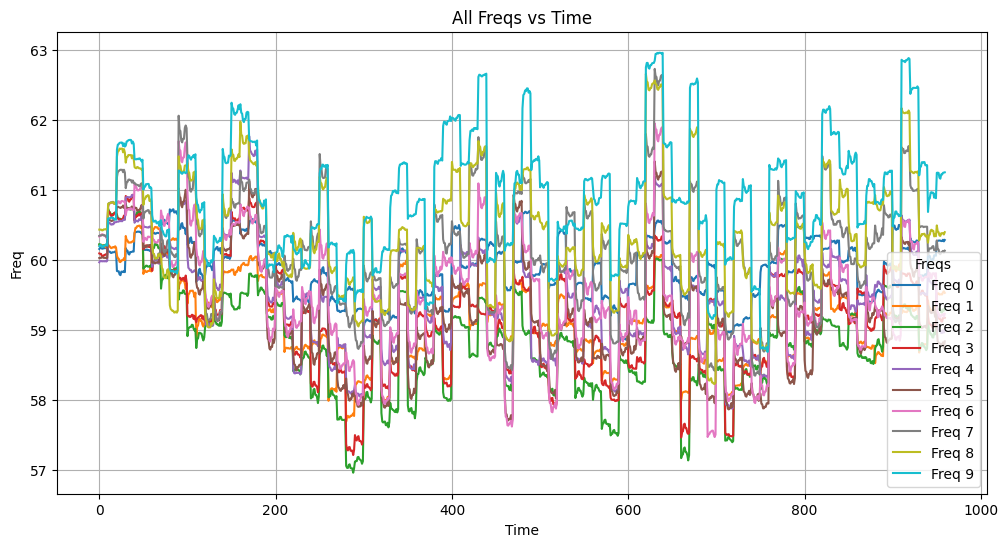

In [5]:
import pandas as pd

num = []
freqs = []
for i, line in enumerate(prep_lines):
    num.append(i)
    freqs.append([float(value) for value in line])

num = np.array(num)
freqs = np.array(freqs).T*60    
# Convert the `freqs` array to a DataFrame for easier plotting with seaborn
freqs_df = pd.DataFrame(freqs.T, columns=[f'Freq {i}' for i in range(freqs.shape[0])])
freqs_df['Time'] = num

# Use a professional palette from seaborn
palette = sns.color_palette("tab10", n_colors=len(freqs_df.columns) - 1)

# Plot all freqs on a single graph
plt.figure(figsize=(12, 6))
for idx, freq in enumerate(freqs_df.columns[:-1]):  # Exclude the 'Time' column
    sns.lineplot(data=freqs_df, x='Time', y=freq, label=freq, color=palette[idx])
plt.xlabel('Time')
plt.ylabel('Freq')
plt.title('All Freqs vs Time')
plt.legend(title='Freqs', loc='lower right')
plt.grid()
plt.show()